In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [25]:
df = pd.read_csv('data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [26]:
df = pd.read_csv('data.csv')
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


1-distplot

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

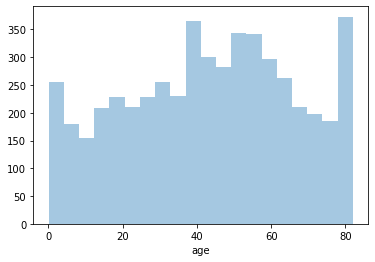

In [28]:
age = sns.distplot(data['age'], kde=False)
plt.show()

In [ ]:
на гистограмме показано сколько человек имеют тот или иной возраст

2-heatmap

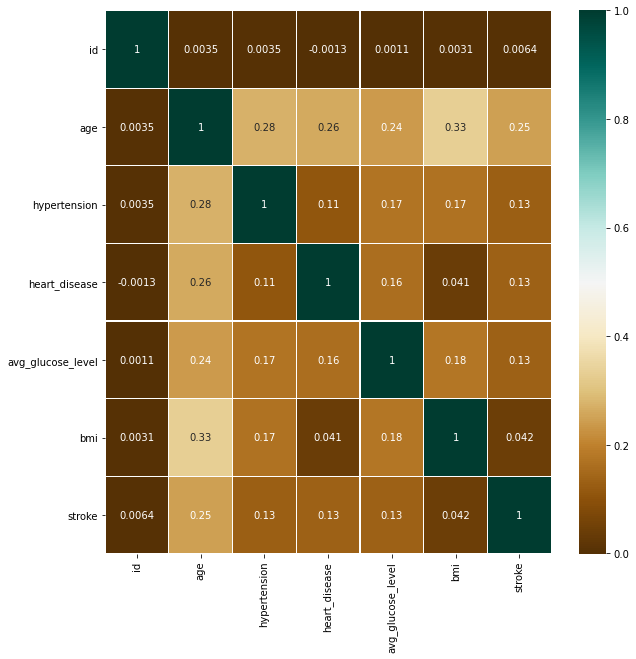

In [29]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.BrBG,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [ ]:
показана тепловая карта

3-Scatter plot matrix

In [39]:
data = df.groupby('id')[['age','hypertension', 'heart_disease','avg_glucose_level']].sum()\
     .sort_values('avg_glucose_level', ascending=False)
data.head()

,age,hypertension,heart_disease,avg_glucose_level
id,,,,
69112,68.0,1,1,271.74
22440,49.0,0,0,267.76
26267,76.0,0,0,267.61
10995,76.0,1,0,267.60
27626,60.0,0,0,266.59


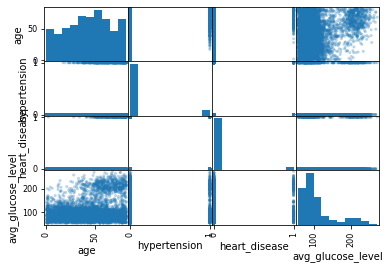

In [47]:
pd.plotting.scatter_matrix(data, alpha=0.3)
plt.show()

4-jointplot

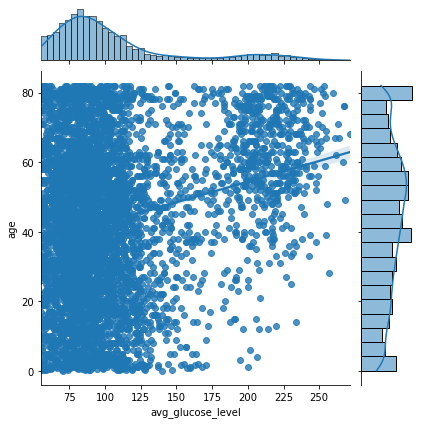

In [55]:
sns.jointplot(x='avg_glucose_level', y='age', data=data, kind='reg')
plt.show()

чем старше человек, тем больше у него уровень глюкозы

5-subplot

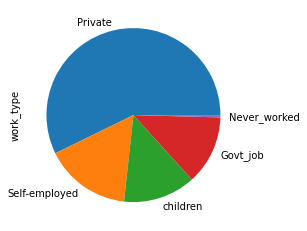

In [58]:
circle = df['work_type'].value_counts()
circle.plot(kind='pie', y='Count')
plt.show()

самый частый вид работы - неофициальный


6-boxplot

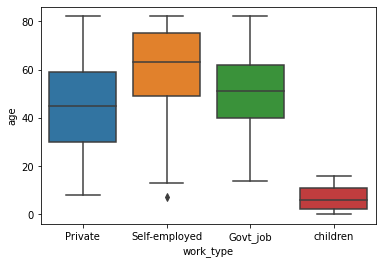

In [67]:
work = df.work_type.value_counts().sort_values(ascending=False).head(4).index.values
work
ax = sns.boxplot(x="work_type", y="age", 
            data=df[df.work_type.isin(work)])

На диаграмме видно что частными предпринимателями в среднем становятся люди в 60+ лет
Правительственной деятельностью занимаются чаще всего люди от 50 лет
Неофициальной работой люди примерно в 45 лет
и дети являются детьми до 18